# DAT565 Assignment 1 – Group 43

- Student 1 - Luca Modica - (5 hours)
- Student 2 - Hugo Alves Henriques E Silva - (5 hours)
- Student 3 - YenPo Lin - (5 hours)

September 2, 2023

---

## Introduction

In this assignment we have worked with datasets from [ourworldindata.org](https://ourworldindata.org/) and Python to produce thoughtful analyses and interesting visualizations. In particular, we have analysed 3 datasets regarding 3 indicators that represent each country:

- **GDP**: Gross domestic product. The standard measure of the value added created through the production of goods and services in a country during a certain period [1].
- **GDP per capita**: GDP divided by the midyear population [1].
- **Life Expectancy at Birth**: estimate of the life span of a person at birth [2].

The goal of the analysis is to visualize data to have a clearer understanding and answering 4 different questions to deepen the knowledge about those information.

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# config inline plots
%matplotlib inline

# set seaborn style
sns.set_style('darkgrid')

## Importing the dataset sources

Before diving deep into the data analysis of data we will import the 3 datasets, one for each each feature: GDP per capita, life expectancy and GDP. We will also check out the head of each dataframe to check for their data integrity.

In [2]:
# importing and showing the head of the gdp per capita dataset
df_gdp_per_capita = pd.read_csv('../datasets/gdp-per-capita-penn-world-table.csv')
df_gdp_per_capita.head()

,Entity,Code,Year,"GDP per capita (output, multiple price benchmarks)"
0,Albania,ALB,1970,3114.0884
1,Albania,ALB,1971,3159.8088
2,Albania,ALB,1972,3214.6665
3,Albania,ALB,1973,3267.8481
4,Albania,ALB,1974,3330.0708


In [3]:
# importing and showing the head of the life expectancy dataset
df_life = pd.read_csv('../datasets/life-expectancy.csv')
df_life.head()

,Entity,Code,Year,Life expectancy at birth (historical)
0,Afghanistan,AFG,1950,27.7
1,Afghanistan,AFG,1951,28.0
2,Afghanistan,AFG,1952,28.4
3,Afghanistan,AFG,1953,28.9
4,Afghanistan,AFG,1954,29.2


In [4]:
# importing and showing the head of the gdp dataset
df_gdp = pd.read_csv('../datasets/national-gdp-wb.csv')
df_gdp.head()

,Entity,Code,Year,"GDP, PPP (constant 2017 international $)"
0,Afghanistan,AFG,2002,26890054000
1,Afghanistan,AFG,2003,29265058000
2,Afghanistan,AFG,2004,29678901000
3,Afghanistan,AFG,2005,33011757000
4,Afghanistan,AFG,2006,34780330000


## Data cleaning and data selection

After printing the first 5 rows of the dataframes, we will use the `merge()` function from the Pandas library to create the dataframe that will be used in the assignment. In particular, the merge operation will be an inner join. There are 2 main reason for this choice:



- To have a single dataframe to be handled in the assignment



- Since the merge operation is an inner join we are also able to perform data cleaning related to the information we want to analyze (GDP per capita, life expectancy and GDP), removing null values in those 3 feature columns.



The country name, the country code and the year will be used as primary key to perform the merge among the 3 Pandas objects. 





In [5]:
df = pd.merge(df_gdp_per_capita, df_life, on=['Entity', 'Code', 'Year']).merge(df_gdp, on=['Entity', 'Code', 'Year'])
df

,Entity,Code,Year,"GDP per capita (output, multiple price benchmarks)",Life expectancy at birth (historical),"GDP, PPP (constant 2017 international $)"
0,Albania,ALB,1990,3681.2083,73.1,15867113000
1,Albania,ALB,1991,3299.2512,73.4,11423983000
2,Albania,ALB,1992,3009.1530,73.7,10602928000
3,Albania,ALB,1993,3512.3381,73.9,11616506000
4,Albania,ALB,1994,4027.3682,74.1,12581008000
...,...,...,...,...,...,...
5043,Zimbabwe,ZWE,2015,2880.9058,59.6,32752806000
5044,Zimbabwe,ZWE,2016,2919.6170,60.3,33047894000
5045,Zimbabwe,ZWE,2017,3112.8750,60.7,34396336000
5046,Zimbabwe,ZWE,2018,3007.2370,61.4,36119544000


The last operation that will be useful in the next steps (especially for the data selection) is the filtering of the available years after the merge operation:

In [6]:
# Grouping by 'Category' and finding the intersection of values between groups
grouped = df.groupby('Code')['Year'].apply(set)

# Finding the common values between categories
common_year = set.intersection(*grouped)

print(common_year)

{2016, 2017, 2018, 2013, 2014, 2015}


### Specific year selection

After merging the datasets, we are now sure that we are analyzing data for countries in the same years. For the selection of the specific year we chose the most recent one, so the results would hopefully be the most accurate related to the current date.

In [7]:
df_recent = df[df['Year'] == max(common_year)]
df_recent

,Entity,Code,Year,"GDP per capita (output, multiple price benchmarks)",Life expectancy at birth (historical),"GDP, PPP (constant 2017 international $)"
28,Albania,ALB,2018,12267.3120,79.2,38178680000
58,Algeria,DZA,2018,11773.6420,76.1,491630950000
88,Angola,AGO,2018,7588.6620,62.1,215117920000
118,Antigua and Barbuda,ATG,2018,16183.1300,78.5,2023584300
148,Argentina,ARG,2018,23018.5490,77.0,1012127200000
...,...,...,...,...,...,...
4926,Uruguay,URY,2018,20458.2640,77.6,79454680000
4956,Uzbekistan,UZB,2018,12263.4240,71.1,233425600000
4986,Vietnam,VNM,2018,7217.9240,74.0,914595640000
5016,Zambia,ZMB,2018,3196.1765,62.3,61104857000


## Data visualization: single year

Here is a function that creates a scatter plot given the **x** and **y** axis.

In [8]:
def makeScatterPlot(xAxis, yAxis, title, xlabel, ylabel):
    sns.scatterplot(x=xAxis, y=yAxis)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

Now we can create a scatter plot of the dataframe where the **x** axis corresponds to the GDP per capita in USD dollars and the **y** axis corresponds to the life expectancy at birth in years.

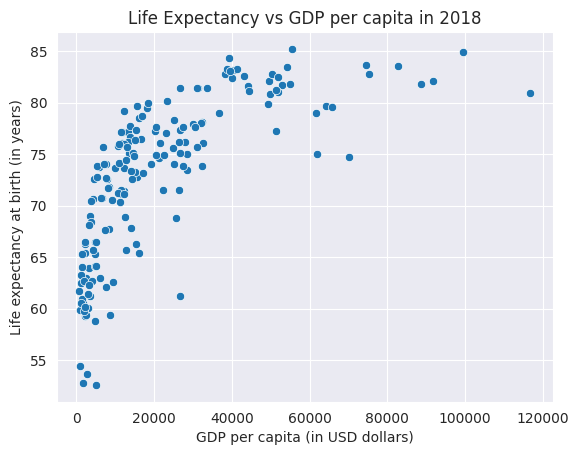

In [9]:
makeScatterPlot(
    df_recent['GDP per capita (output, multiple price benchmarks)'], 
    df_recent['Life expectancy at birth (historical)'], 
    'Life Expectancy vs GDP per capita in 2018',
    'GDP per capita (in USD dollars)',
    'Life expectancy at birth (in years)'
)

# Display the plot
plt.show()

## Questions

### 1) Which countries have a life expectancy higher than one standard deviation above the mean?

In order to answer this question, we show graphically which countries are above the specified threshold, and then we list the nations.
For that, we first had to calculate both the standard deviation and the average of the life expectancy feature to obtain their values.

In [10]:
life_mean = df_recent['Life expectancy at birth (historical)'].mean()
life_std = df_recent['Life expectancy at birth (historical)'].std()
life_high = int(life_mean + life_std)


print(f'Average life expectancy: {life_mean} years')
print(f'Life expectancy standard deviation: {life_std} years')
print(f'High life expectancy indicator: {life_high} years')

Average life expectancy: 72.84400000000001 years
Life expectancy standard deviation: 7.623817488860045 years
High life expectancy indicator: 80 years


To visualize the countries that actually have high life expectancy, we add to the previous scatter plot a dashed red line that refers to our high life expectancy indicator.

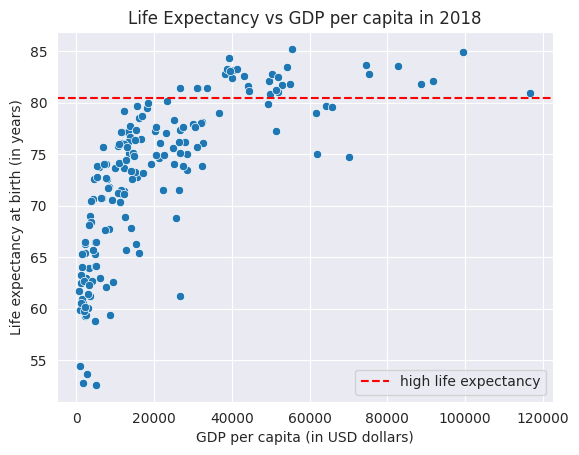

In [11]:
makeScatterPlot(
    df_recent['GDP per capita (output, multiple price benchmarks)'], 
    df_recent['Life expectancy at birth (historical)'], 
    'Life Expectancy vs GDP per capita in 2018',
    'GDP per capita (in USD dollars)',
    'Life expectancy at birth (in years)'
)
plt.axhline(y=df_recent['Life expectancy at birth (historical)'].std() + df_recent['Life expectancy at birth (historical)'].mean(), color='red', linestyle='--', label='high life expectancy')
plt.legend()
plt.show()

In [12]:
countries = df_recent[df_recent['Life expectancy at birth (historical)'] > life_std + life_mean]['Entity'].unique()
print(f'{len(countries)} countries with high life expectancy:')
print(countries)

32 countries with high life expectancy:
['Australia' 'Austria' 'Belgium' 'Bermuda' 'Canada' 'Cyprus' 'Denmark'
 'Finland' 'France' 'Germany' 'Greece' 'Hong Kong' 'Iceland' 'Ireland'
 'Israel' 'Italy' 'Japan' 'Luxembourg' 'Macao' 'Malta' 'Netherlands'
 'New Zealand' 'Norway' 'Portugal' 'Qatar' 'Singapore' 'Slovenia'
 'South Korea' 'Spain' 'Sweden' 'Switzerland' 'United Kingdom']


There are 32 countries with life expectancy higher than one standard deviation above the mean. These countries are:
Australia, Austria, Belgium, Bermuda, Canada, Cyprus, Denmark, Finland, France, Germany, Greece, Hong Kong, Iceland, Ireland, Israel, Italy, Japan, Luxembourg, Macao, Malta, Netherlands, New Zealand, Norway, Portugal, Qatar, Singapore, Slovenia, South Korea, Spain, Sweden, Switzerland, and United Kingdom.


### 2) Which countries have high life expectancy but have low GDP (note the difference between GDP and GDP per capita)? Motivate how you have chosen to define “high” and “low.”

Before answering the question, we will state what we mean for Low/High GDP and Low/High Life Expectancy.

- Low GDP: less than the median of GDP in every country. Did not make sense to use standard deviation in this case because the countries' GDP's vary too much.

- High GDP: more than the median of GDP in every country.

- Low Life Expectancy: less than one standard deviation below the mean of the value in every country.

- High Life Expectancy: more than one standard deviation above the mean of the value in every country.

These values will be visualized in the first scatter plot, to see how countries are divided based on these indicators: 

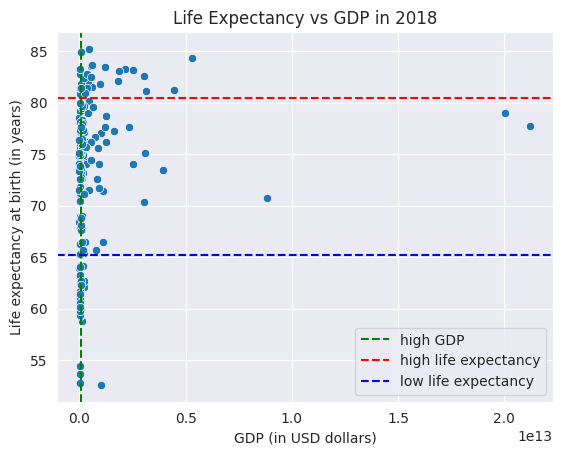

In [13]:
makeScatterPlot(
    df_recent['GDP, PPP (constant 2017 international $)'], 
    df_recent['Life expectancy at birth (historical)'], 
    'Life Expectancy vs GDP in 2018',
    'GDP (in USD dollars)',
    'Life expectancy at birth (in years)'
)
plt.axvline(x=df_recent['GDP, PPP (constant 2017 international $)'].median(), color = 'green', linestyle='--', label = 'high GDP')
plt.axhline(y=df_recent['Life expectancy at birth (historical)'].std() + df_recent['Life expectancy at birth (historical)'].mean(), color='red', linestyle='--', label='high life expectancy')
plt.axhline(y=df_recent['Life expectancy at birth (historical)'].mean() - df_recent['Life expectancy at birth (historical)'].std(), color='blue', linestyle='--', label='low life expectancy')
plt.legend()
plt.show()

The obtained scatter plot is divided into 6 quadrants:

- *Quadrants above the red line*
    - Left quadrant: High Life Expectancy & low GDP
    - Right quadrant: High Life Expectancy & High GDP
- *Quadrants between red and blue lines*
    - Left quadrant: Life Expectancy inside the normal interval & Low GDP
    - Right quadrant: Life Expectancy inside the normal interval & High GDP
- *Quadrants below blue line*
    - Left quadrant: Low Life Expectancy & Low GDP
    - Right quadrant: Low Life Expectancy & High GDP

In [14]:
gdp = df_recent['GDP, PPP (constant 2017 international $)'].median()

high_life_exp = df_recent[df_recent['Life expectancy at birth (historical)'] > life_std + life_mean]
high_life_low_gdp = high_life_exp[high_life_exp['GDP, PPP (constant 2017 international $)'] < gdp]


print(f'{len(high_life_low_gdp)} countries with high life expectancy and low GDP.')
print(high_life_low_gdp['Entity'].unique())

7 countries with high life expectancy and low GDP.
['Bermuda' 'Cyprus' 'Iceland' 'Luxembourg' 'Macao' 'Malta' 'Slovenia']


The results show that there are **7** countries with high life expectancy and low GDP which are:
`Bermuda, Cyprus, Iceland, Luxembourg, Macao, Malta and Slovenia`

To answer this question properly we had to play around with the GDP indicator. We chose to use the median of the GDP as it gave us results that made more sense. Previously we were using its mean as a reference point, although some countries which we consider to have high GDP, such as Denmark or Sweden, were being included among the low GDP ones.

On the other hand some of the countries that are on this list, like Luxembourg, are not considered to have low GDP, but it could make sense that they are still included in the low GDP set as the GDP also depends on the number of the population. Luxembourg has a small population, therefore, this could be a reason why it is not considered to have high GDP.

### 3) Does every strong economy (normally indicated by GDP) have high life expectancy?

In [15]:
low_life_exp = df_recent[df_recent['Life expectancy at birth (historical)'] < life_mean + life_std]
high_gdp_low_life=low_life_exp[low_life_exp['GDP, PPP (constant 2017 international $)'] > gdp]
print(f'{len(high_gdp_low_life)} countries have High GDP and not a High Life Expectancy:')
print(high_gdp_low_life['Entity'].unique())

62 countries have High GDP and not a High Life Expectancy:
['Algeria' 'Angola' 'Argentina' 'Azerbaijan' 'Bangladesh' 'Belarus'
 'Bolivia' 'Brazil' 'Bulgaria' 'Chile' 'China' 'Colombia' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Czechia' 'Dominican Republic' 'Ecuador'
 'Egypt' 'Ethiopia' 'Ghana' 'Guatemala' 'Hungary' 'India' 'Indonesia'
 'Iran' 'Iraq' 'Jordan' 'Kazakhstan' 'Kenya' 'Kuwait' 'Lebanon'
 'Lithuania' 'Malaysia' 'Mexico' 'Morocco' 'Myanmar' 'Nepal' 'Nigeria'
 'Oman' 'Pakistan' 'Panama' 'Peru' 'Philippines' 'Poland' 'Romania'
 'Russia' 'Saudi Arabia' 'Serbia' 'Slovakia' 'South Africa' 'Sri Lanka'
 'Sudan' 'Tanzania' 'Thailand' 'Tunisia' 'Turkey' 'Ukraine'
 'United Arab Emirates' 'United States' 'Uzbekistan' 'Vietnam']


As indicated by the scatter plot shown in question 2, there is a great number of countries that belong to the middle right and bottom right quadrants, therefore, not every strong economy has high life expectancy when using GDP as an indicator. There are **62** countries that are considered to have a strong economy yet are below the life expectancy's upper bound.

### 4) Related to the above question (question 3), what happens if you use GDP per capita as an indicator of a strong economy as opposed to GDP alone? Explain the results you obtain through this analysis, and discuss any insights you get from comparing these results to question 3.

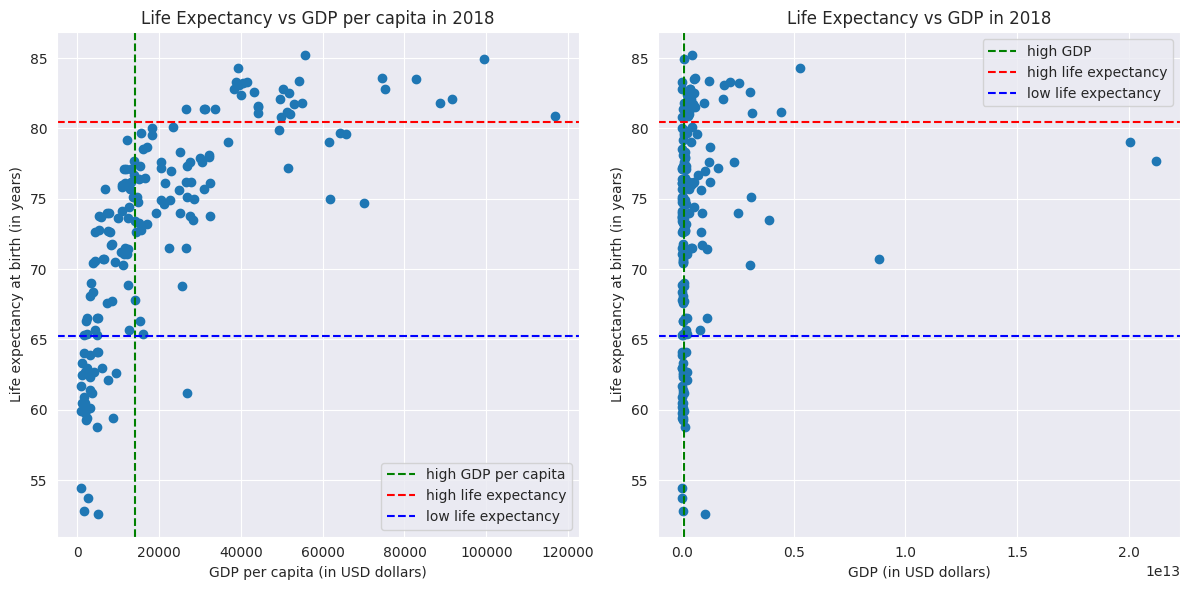

55 countries are not considered to have high life expectancy but have high GDP per capita.
62 countries are not considered to have high life expectancy but have high GDP.


7 more countries with a strong economy have high-life-expectancy feature when using GDP instead of GDP per capita.


In [16]:
# Create a figure with a grid of 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# First subplot
axs[0].scatter(df_recent['GDP per capita (output, multiple price benchmarks)'],
               df_recent['Life expectancy at birth (historical)'])
axs[0].axvline(x=df_recent['GDP per capita (output, multiple price benchmarks)'].median(), color='green', linestyle='--', label='high GDP per capita')
axs[0].axhline(y=df_recent['Life expectancy at birth (historical)'].std() + df_recent['Life expectancy at birth (historical)'].mean(), color='red', linestyle='--', label='high life expectancy')
axs[0].axhline(y=df_recent['Life expectancy at birth (historical)'].mean() - df_recent['Life expectancy at birth (historical)'].std(), color='blue', linestyle='--', label='low life expectancy')
axs[0].set_title('Life Expectancy vs GDP per capita in 2018')
axs[0].set_xlabel('GDP per capita (in USD dollars)')
axs[0].set_ylabel('Life expectancy at birth (in years)')
axs[0].legend()

# Second subplot
axs[1].scatter(df_recent['GDP, PPP (constant 2017 international $)'],
               df_recent['Life expectancy at birth (historical)'])
axs[1].axvline(x=df_recent['GDP, PPP (constant 2017 international $)'].median(), color='green', linestyle='--', label='high GDP')
axs[1].axhline(y=df_recent['Life expectancy at birth (historical)'].std() + df_recent['Life expectancy at birth (historical)'].mean(), color='red', linestyle='--', label='high life expectancy')
axs[1].axhline(y=df_recent['Life expectancy at birth (historical)'].mean() - df_recent['Life expectancy at birth (historical)'].std(), color='blue', linestyle='--', label='low life expectancy')
axs[1].set_title('Life Expectancy vs GDP in 2018')
axs[1].set_xlabel('GDP (in USD dollars)')
axs[1].set_ylabel('Life expectancy at birth (in years)')
axs[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()
gdp_capita = df_recent['GDP per capita (output, multiple price benchmarks)'].median()
low_life_exp = df_recent[df_recent['Life expectancy at birth (historical)'] < life_mean + life_std]
low_life_high_gdp_per_capita = low_life_exp[low_life_exp['GDP per capita (output, multiple price benchmarks)'] > gdp_capita]

print(f'{len(low_life_high_gdp_per_capita)} countries are not considered to have high life expectancy but have high GDP per capita.')
print(f'{len(high_gdp_low_life)} countries are not considered to have high life expectancy but have high GDP.')
print('\n')
print(f'{len(high_gdp_low_life)-len(low_life_high_gdp_per_capita)} more countries with a strong economy have high-life-expectancy feature when using GDP instead of GDP per capita.')


If we use GDP per capita as an indicator of a strong economy we do obtain different results opposed to using GDP itself. 7 more countries with a strong economy have high life expectancy when using GDP instead of GDP per capita. Here are some reasons that could explain the differences obtained:

- A high GDP could be the result of a large population and not necessarily a wealthy one. Therefore, countries with low GDP per capita and low life expectancy can have high GDP.

- Normally, GDP is a better measure to indicate the wealth of a whole country and not the well-being. In this case, well-being can be referred to as life expectancy of the population itself.

Note: We have also used the median of the GDP per capita as an indicator.

## References

[1] Max Roser, Pablo Arriagada, Joe Hasell, Hannah Ritchie and Esteban Ortiz-Ospina (2023) - "Economic Growth". Published online at OurWorldInData.org. Retrieved from: 'https://ourworldindata.org/economic-growth' [Online Resource]

[2] Max Roser, Esteban Ortiz-Ospina and Hannah Ritchie (2013) - "Life Expectancy". Published online at OurWorldInData.org. Retrieved from: 'https://ourworldindata.org/life-expectancy' [Online Resource]